In [1]:
# Importing important libraties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore un-essential warnings
import warnings
warnings.filterwarnings("ignore")

# Formating styles
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")
plt.style.use('ggplot')

# For clear plots
%config InlineBackend.figure_format = 'retina'

## Loading Data

In [2]:
df = pd.read_csv('priv_mcare_f_pay.csv')

In [3]:
df.head()

,msa,year,site,group,priv_count,priv_pay_mean,priv_pay_median,priv_pay_iqr,mcare_pay_mean,mcare_pay_median,mcare_pay_sd,CBSA_NAME,State,FIPS State Code,lon,lat
0,10180,2018,Inpatient,breast reconstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Abilene, TX",Texas,48,-99.733144,32.448736
1,10420,2018,Inpatient,breast reconstruction,8.0,19937.08375,16147.330,5692.86,NaN,NaN,NaN,"Akron, OH",Ohio,39,-81.519005,41.081445
2,10500,2018,Inpatient,breast reconstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Albany, GA",Georgia,13,-84.155741,31.578507
3,10540,2018,Inpatient,breast reconstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Albany-Lebanon, OR",Oregon,41,-122.907034,44.536512
4,10580,2018,Inpatient,breast reconstruction,4.0,14837.26000,10420.675,4474.06,NaN,NaN,NaN,"Albany-Schenectady-Troy, NY",New York,36,-73.653621,42.763648


In [4]:
df = df.rename(columns={"FIPS State Code": "FIPS_State_Code"})

## Understanding the data

In [5]:
df.shape

(133089, 16)

In [6]:
df.dtypes

msa                   int64
year                  int64
site                 object
group                object
priv_count          float64
priv_pay_mean       float64
priv_pay_median     float64
priv_pay_iqr        float64
mcare_pay_mean      float64
mcare_pay_median    float64
mcare_pay_sd        float64
CBSA_NAME            object
State                object
FIPS_State_Code       int64
lon                 float64
lat                 float64
dtype: object

In [7]:
# Checking unique values of each object type columns

for col in ['site', 'group', 'CBSA_NAME', 'State']:
    print(f'''
    Column: {col}
    Type: {df[col].dtypes}
    
    Unique Values:
    {df[col].unique()}
    
    ---
    ''')


    Column: site
    Type: object
    
    Unique Values:
    ['Inpatient' 'Outpatient' 'ASC']
    
    ---
    

    Column: group
    Type: object
    
    Unique Values:
    ['breast reconstruction' 'mastectomy' 'navigation' 'ant_cerv_fusion'
 'ant_tls_fusion' 'post_cerv_fusion' 'post_tls_fusion' 'rtc_slap_bank'
 'partial shoulder arthroplasty' 'tsa' 'clavicle fixation'
 'proximal humerus' 'radius/ulna internal fixation' 'tha' 'revision_tha'
 'hip_fracture_fixation' 'tka' 'revision_tka' 'femoral shaft fixation'
 'prox_tibia_fixation' 'ankle_fix' 'bunionectomy' 'pnn' 'fess'
 'septoplasty' 'bsp' 'thoracic' 'lung ablation' 'laac' 'tavr' 'bariatric'
 'colorect' 'lap appendectomy' 'hepat' 'liver ablation' 'hernia'
 'kidney ablation' 'hysterect' 'intracranial_thromb' 'bdet'
 'cardiac ablation' 'cardiac ablation_additional_discrete'
 'cardiac ablation_linear_focal' 'cardiac_ablaton_ice'
 'cardiac_ablaton_anesthesia' 'tpa' 'orthovisc_monovisc'
 'robotic_assisted_surgery' 'pka' 'prostatecto

In [45]:
df.columns

Index(['msa', 'year', 'site', 'group', 'priv_count', 'priv_pay_mean',
       'priv_pay_median', 'priv_pay_iqr', 'mcare_pay_mean', 'mcare_pay_median',
       'mcare_pay_sd', 'CBSA_NAME', 'State', 'FIPS_State_Code', 'lon', 'lat'],
      dtype='object')

In [46]:
num_features = ['priv_count', 'priv_pay_mean', 'priv_pay_median', 'priv_pay_iqr', 'mcare_pay_mean', 
                'mcare_pay_median', 'mcare_pay_sd', 'lon', 'lat']

In [44]:
df.describe()

,msa,year,priv_count,priv_pay_mean,priv_pay_median,priv_pay_iqr,mcare_pay_mean,mcare_pay_median,mcare_pay_sd,FIPS_State_Code,lon,lat
count,133089.000000,133089.0000,66202.000000,54334.000000,54334.000000,5.433400e+04,8865.000000,8865.000000,8100.000000,133089.000000,132762.000000,132762.000000
mean,29849.788698,2019.0000,13.978535,28157.253920,26076.224624,9.902053e+03,8195.605203,7844.379437,1829.761700,27.859951,-92.190325,37.817306
std,11423.888454,0.8165,55.079214,30496.418573,28716.343199,1.874054e+04,6955.791018,6588.058967,4547.199710,16.747575,16.193456,5.797395
min,10180.000000,2018.0000,0.000000,-40877.890000,-40877.890000,-3.640000e-12,0.000000,0.000000,0.000000,1.000000,-157.858333,18.080708
25%,19804.000000,2018.0000,0.000000,11428.353750,10270.022500,0.000000e+00,4684.309105,3655.981130,47.042064,13.000000,-98.493067,34.140662
50%,29540.000000,2019.0000,2.000000,20839.994165,19574.552500,4.864392e+03,7019.051111,7005.938534,678.353783,26.000000,-87.491541,38.755920
75%,40140.000000,2020.0000,7.000000,34829.904520,32523.502500,1.220583e+04,8504.399795,8508.872256,1811.004045,42.000000,-80.721442,41.763179
max,49740.000000,2020.0000,2715.000000,991349.210000,991349.210000,1.175990e+06,97342.275000,65779.200000,154929.034900,72.000000,-66.035249,64.837778


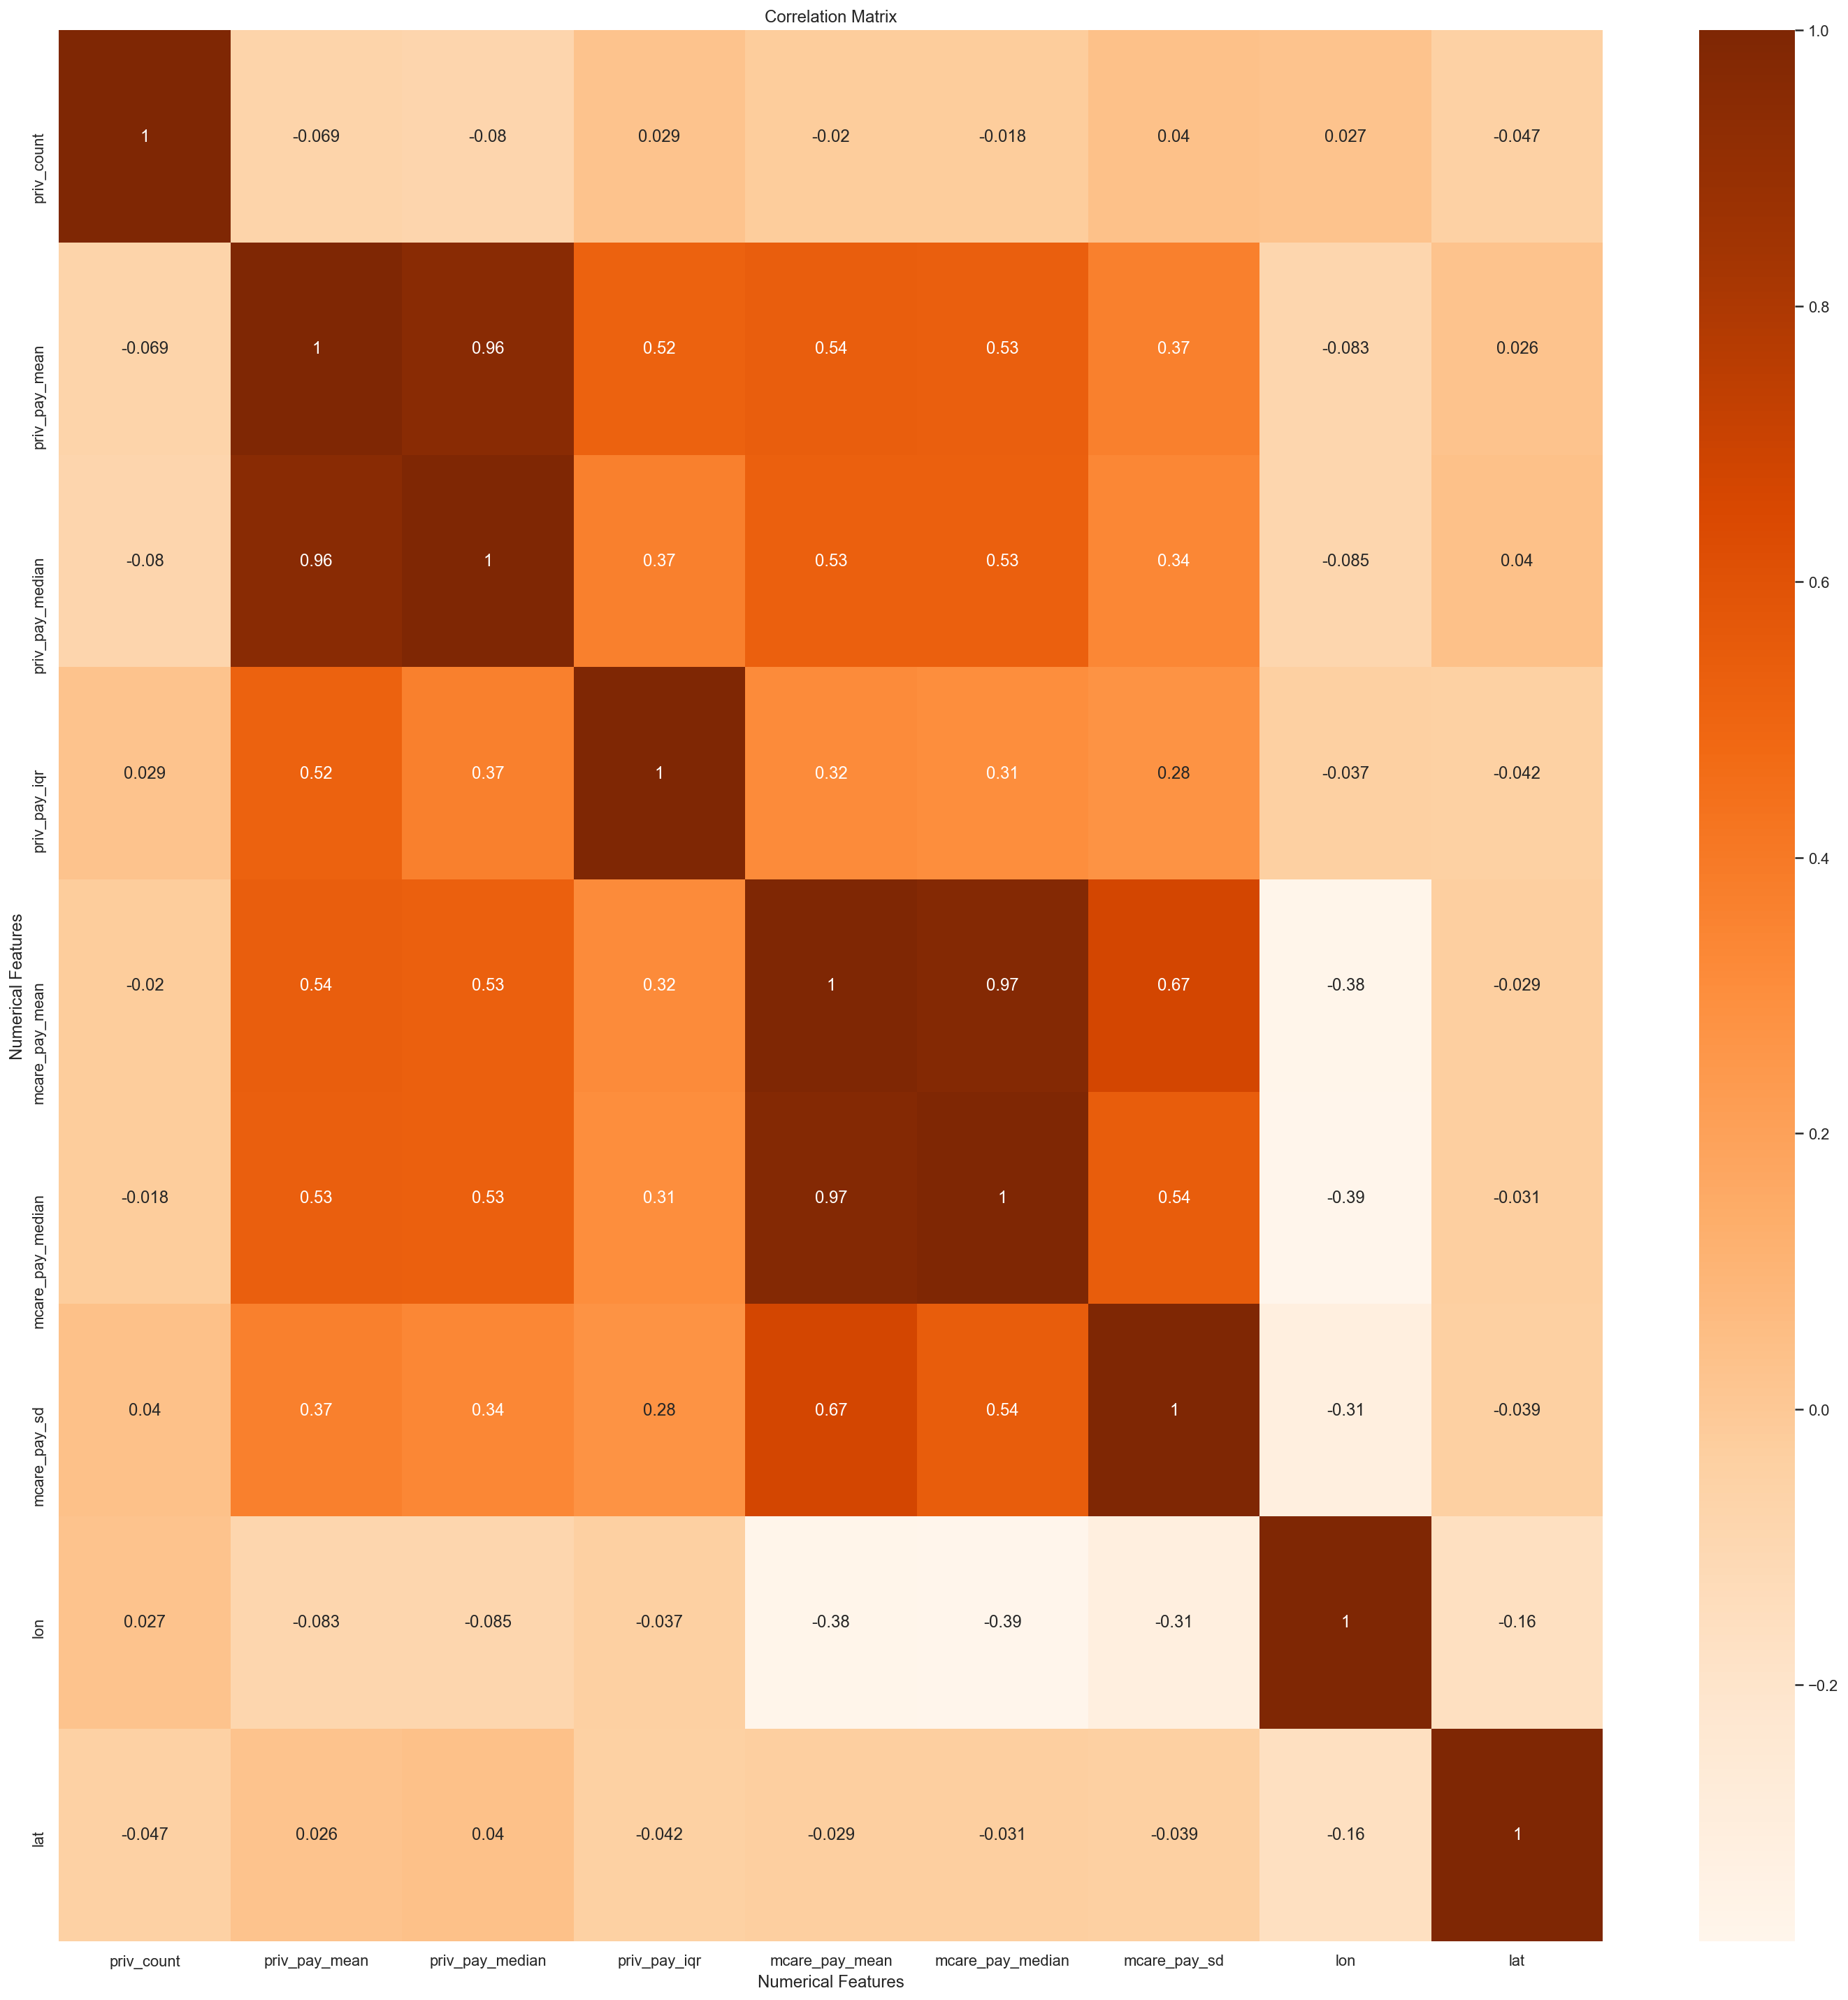

In [47]:
# Plotting correlation matrix

sns.set(rc = {'figure.figsize':(20,20)})
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, cmap="Oranges", annot=True).set(title='Correlation Matrix',
                                         xlabel='Numerical Features',
                                         ylabel='Numerical Features')

plt.tight_layout()

## Missing Values

In [9]:
# Calculating the percentage of missing values for each column

percentages = round(df.isna().sum()*100/df.shape[0], 2)

print('Percentage of Missing Values per column:')
percentages

Percentage of Missing Values per column:


msa                  0.00
year                 0.00
site                 0.00
group                0.00
priv_count          50.26
priv_pay_mean       59.17
priv_pay_median     59.17
priv_pay_iqr        59.17
mcare_pay_mean      93.34
mcare_pay_median    93.34
mcare_pay_sd        93.91
CBSA_NAME            0.00
State                0.00
FIPS_State_Code      0.00
lon                  0.25
lat                  0.25
dtype: float64

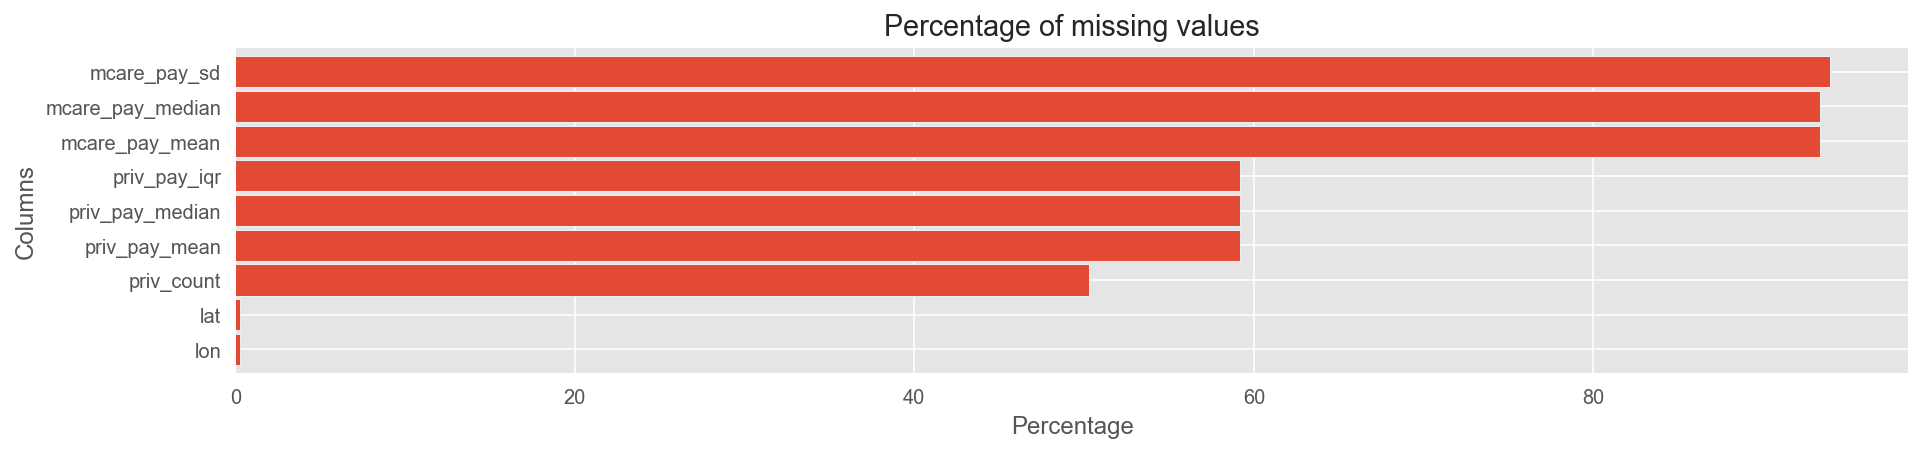

In [10]:
# Plotting the percentage of missing values for each column with missing values

plt.figure(figsize = (15, 3))
percentages[percentages > 0].sort_values().plot.barh(width=0.9)
plt.title('Percentage of missing values')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show();

## Switching to R code for further analysis

In [11]:
%load_ext rpy2.ipython

R[write to console]: -- Attaching packages --------------------------------------- tidyverse 1.3.1 --

R[write to console]: v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

R[write to console]: -- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



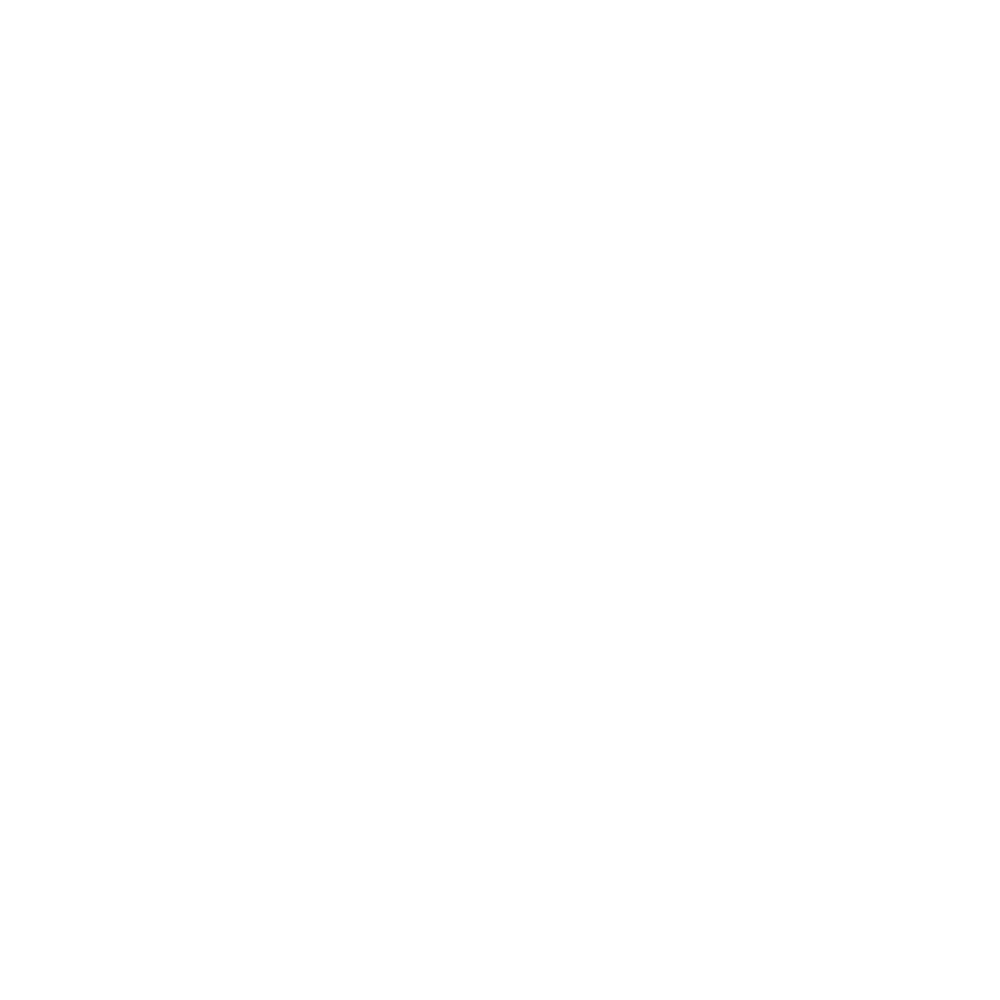

In [12]:
%%R -i df -w 5 -h 5 --units in -r 200

# Libraries
library(tidyverse)
library(patchwork)
library(repr)
library(ggnewscale)
library(RColorBrewer)
library(Lock5withR)

### Creating an R function for missing value patterns plot

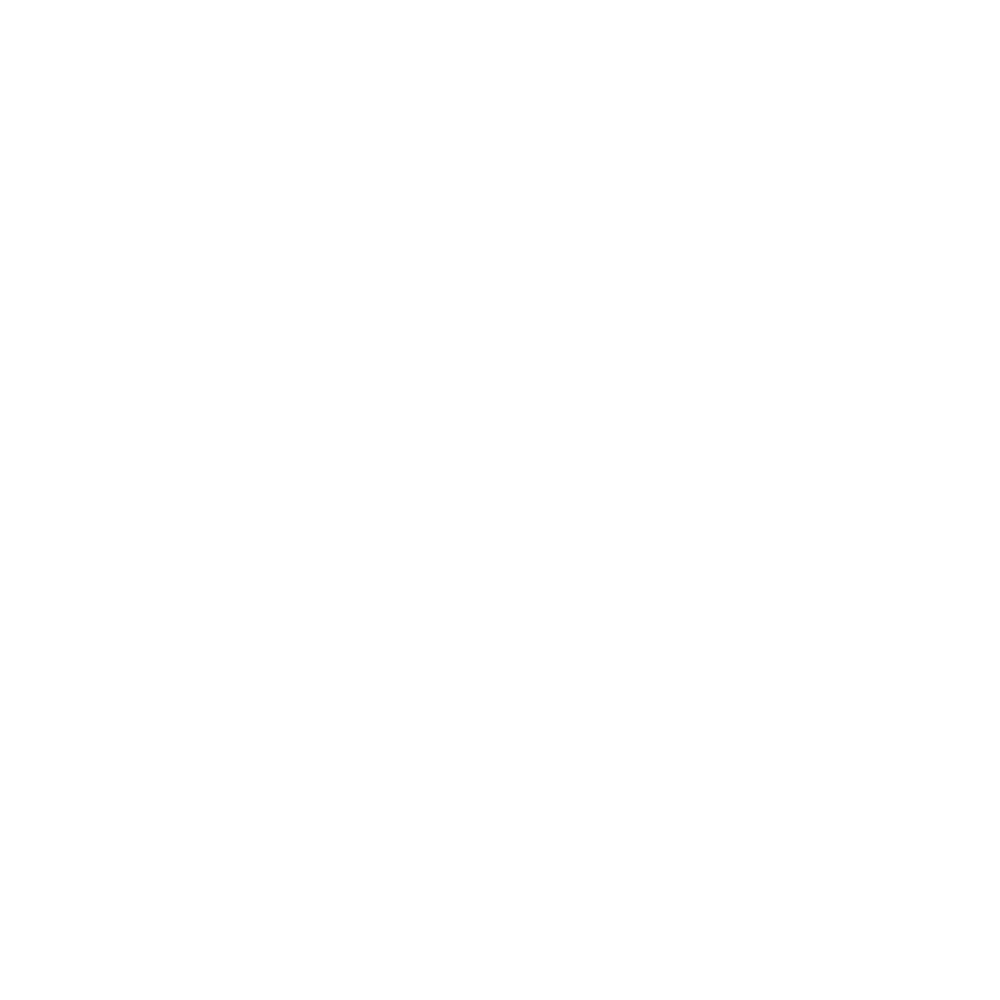

In [36]:
%%R -i df -w 5 -h 5 --units in -r 200

missing_patterns_plot = function(df, percent) {
  
  # Finding number of rows missing for each column, and sorting them
  col_na = data.frame(count_c = colSums(is.na(df)) %>%
    sort(decreasing = TRUE))
  
  col_na_1 = as.data.frame(t(col_na))
  df = df[names(col_na_1)]
  
  # Finding the number of rows missing for each missing pattern
  row_missing_pattern = data.frame(is.na(df)) %>%
    group_by_all() %>%
    count(name = "count", sort = TRUE) %>%
    ungroup()
  
  row_missing_pattern$index = as.factor(1:nrow(row_missing_pattern))
  
  tidy_pattern = row_missing_pattern %>% 
    gather(key = "column_name", value = "missing", -index, -count)
  
  row_missing = row_missing_pattern[, -c(ncol(row_missing_pattern)-1, ncol(row_missing_pattern))]
  row_missing <- row_missing[names(col_na_1)]
  
  c_col <- c(names(row_missing))
  
  row_missing_pattern$missing = apply(row_missing, 1, any)
  
  # geom_text() position defining
  
  val = max(as.numeric(tidy_pattern$index))
  columns_ = unique(tidy_pattern$column_name)
  name = columns_[as.integer(length(columns_)/2) + 1]
  
  no_missing = as.numeric(filter(tidy_pattern %>% 
                                   group_by(index) %>% 
                                   summarize(missing=max(missing)), 
                                 missing==0)['index'])
  
  # Plotting
  
  if (percent == TRUE) {
    col_na = col_na %>% 
      mutate(count_c = 100*count_c/sum(count_c))
    
    row_missing_pattern = row_missing_pattern %>% 
      mutate(count = 100*count/sum(count))
  }
  
  col_count = ggplot(data=col_na, 
                     aes(x=unique(factor(tidy_pattern$column_name, 
                                         levels = colnames(row_missing))),
                         y=count_c)) +
    geom_bar(stat = "identity", fill = "#77D86C") +
    theme_light() +
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.major.x = element_blank()) +
    xlab("") +
    ylab(ifelse(percent == TRUE, "%\nRows\nMissing", "Nums\nRows\nMissing")) +
    ggtitle("Missing Value Patterns")
  
  row_count = 
    ggplot(row_missing_pattern, aes(x = fct_rev(factor(index)), y = count, fill = missing)) +
    geom_bar(stat = "identity") +
    theme_light() +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank()) +
    scale_fill_manual(values = c("#77D86C", "#B3ECAD")) +
    theme(legend.position = "none") +
    xlab("") +
    ylab(ifelse(percent == TRUE, "% Rows", "Row Count")) +
    coord_flip()
  
  missing_pattern = 
    ggplot(tidy_pattern,
           aes(x = factor(column_name, 
                          levels = colnames(row_missing)), 
               y = fct_rev(index), 
               fill = missing)) +
    geom_tile(color = "white", lwd = 1.5) +
    scale_fill_brewer(palette = "Reds") +
    theme(legend.position = "none") +
    xlab("Variable") +
    ylab("Missing Pattern") +
    new_scale_color() +
    geom_tile(tidy_pattern, mapping = aes(factor(column_name), val - no_missing + 1), fill = "#1C1A1A06") +
    annotate("text", x = name, y = val - no_missing + 1, label = "Complete Cases")
  
  missing_value_plot = col_count + 
  plot_spacer() + 
  missing_pattern + 
  row_count + 
  plot_layout(heights = c(1, 2), widths = c(4, 1))
  
  return(missing_value_plot)
}

In [43]:
%%R -i df -w 5 -h 5 --units in -r 200

missing_patterns_plot(df, percent = TRUE)

![missing_patterns_plot](missing_parttern_plot.png)

In [42]:
for i in range(len(df.columns)):
    print(f'Column {i+1}:\t{df.columns[i]}')

Column 1:	msa
Column 2:	year
Column 3:	site
Column 4:	group
Column 5:	priv_count
Column 6:	priv_pay_mean
Column 7:	priv_pay_median
Column 8:	priv_pay_iqr
Column 9:	mcare_pay_mean
Column 10:	mcare_pay_median
Column 11:	mcare_pay_sd
Column 12:	CBSA_NAME
Column 13:	State
Column 14:	FIPS_State_Code
Column 15:	lon
Column 16:	lat
